In [3]:
import pandas_datareader.data as pdr
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
start = datetime.datetime(2022,1,1)
end = datetime.datetime.today()

In [8]:
google = pdr.DataReader('GOOGL', 'yahoo', start, end)
google

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-31,146.698502,144.852005,146.050003,144.852005,18136000.0,144.852005
2022-01-03,145.850998,143.712997,145.054993,144.991501,28646000.0,144.991501
2022-01-04,146.485001,143.716507,145.395996,144.399506,28400000.0,144.399506
2022-01-05,144.499496,137.688004,144.419998,137.774994,54618000.0,137.774994
2022-01-06,139.940002,136.558502,136.998505,137.747498,37348000.0,137.747498
...,...,...,...,...,...,...
2022-11-04,86.639999,83.709999,85.400002,86.580002,51105600.0,86.580002
2022-11-07,88.900002,86.849998,87.279999,88.489998,34078900.0,88.489998
2022-11-08,90.320000,87.589996,88.900002,88.900002,30429000.0,88.900002


Text(0, 0.5, 'Stock Price')

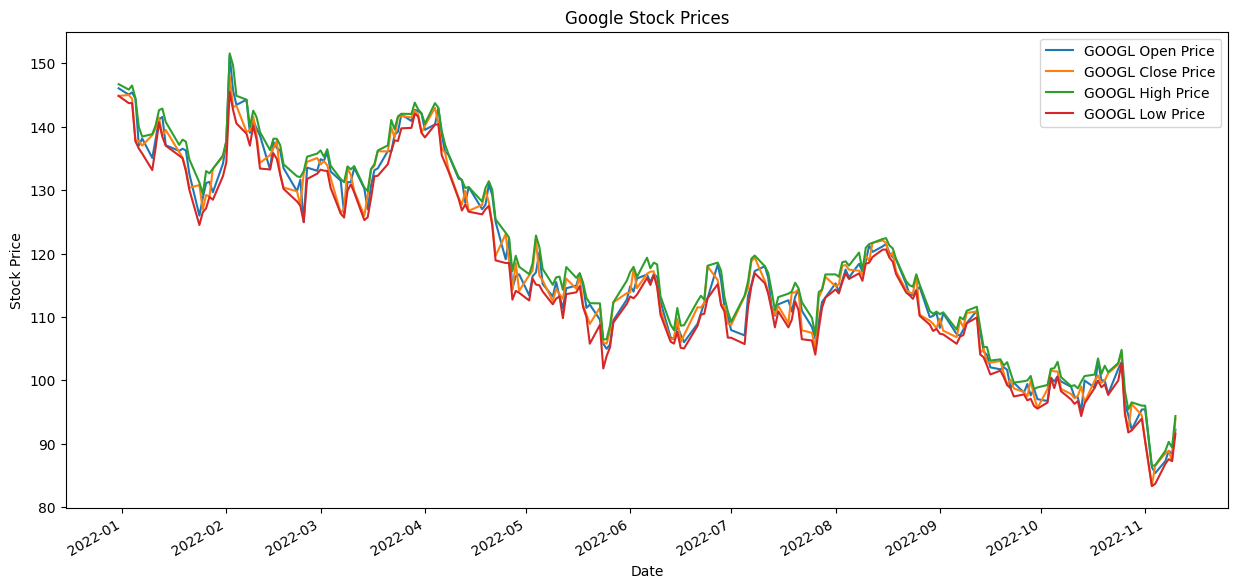

In [17]:
google['Open'].plot(label= 'GOOGL Open Price', figsize=(15,7))
google['Close'].plot(label= 'GOOGL Close Price')
google['High'].plot(label= 'GOOGL High Price')
google['Low'].plot(label= 'GOOGL Low Price')
plt.legend()
plt.title('Google Stock Prices')
plt.ylabel('Stock Price')

Text(0.5, 1.0, 'Volume Traded')

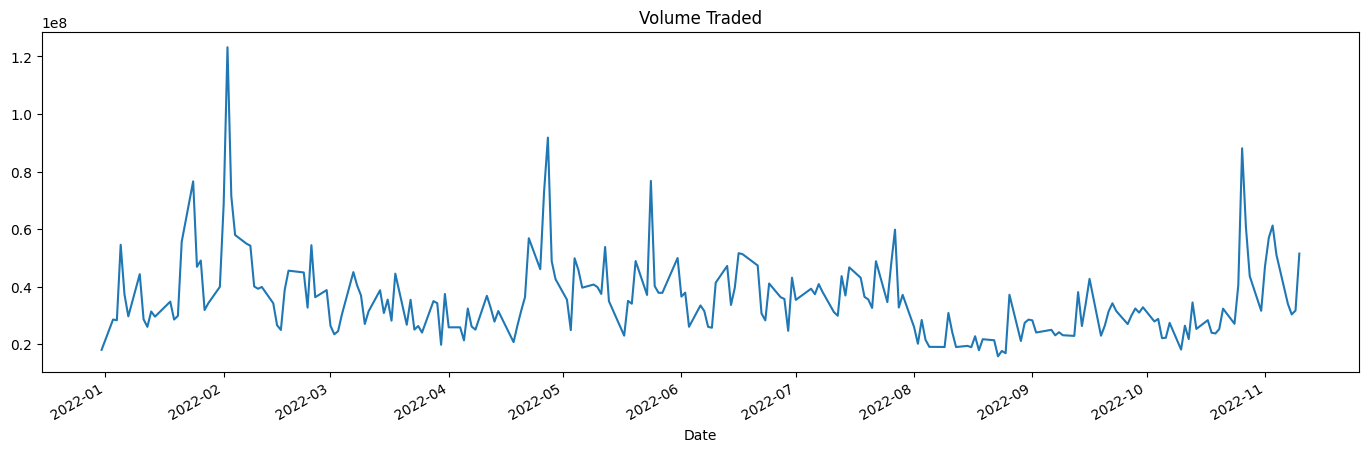

In [20]:
google['Volume'].plot(figsize=(17,5))
plt.title('Volume Traded')

In [21]:
tesla = pdr.DataReader('TSLA', 'yahoo', start, end)
gm = pdr.DataReader('GM', 'yahoo', start, end)
ford = pdr.DataReader('F', 'yahoo', start, end)

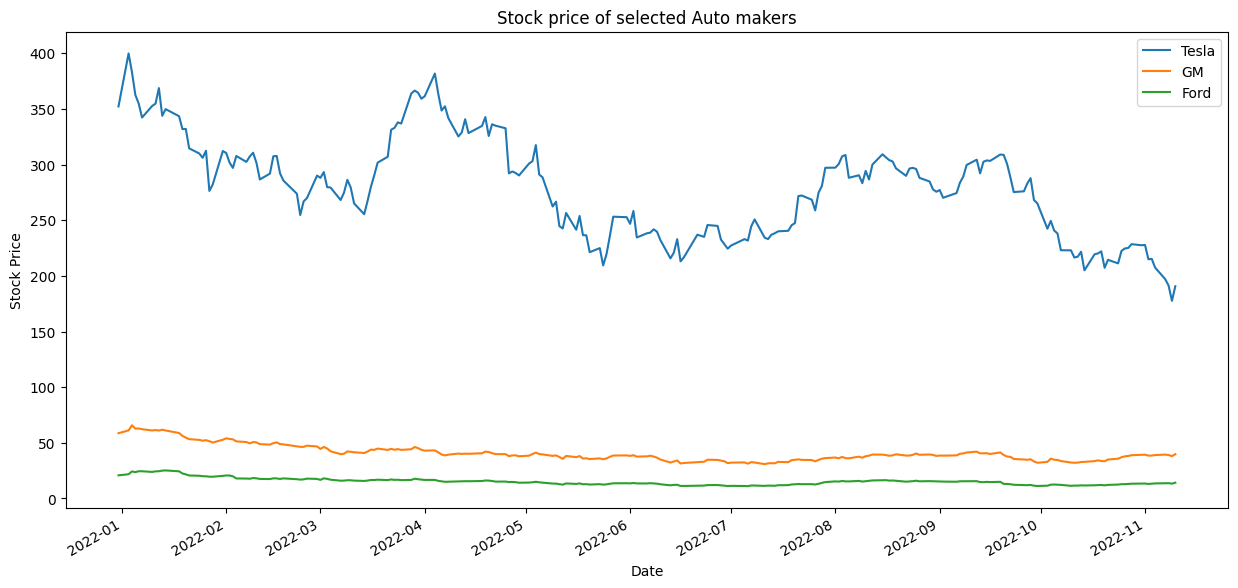

In [29]:
tesla['Close'].plot(label="Tesla",figsize=(15,7))
gm['Close'].plot(label="GM")
ford['Close'].plot(label="Ford")
plt.ylabel('Stock Price')
plt.title("Stock price of selected Auto makers")
plt.legend()

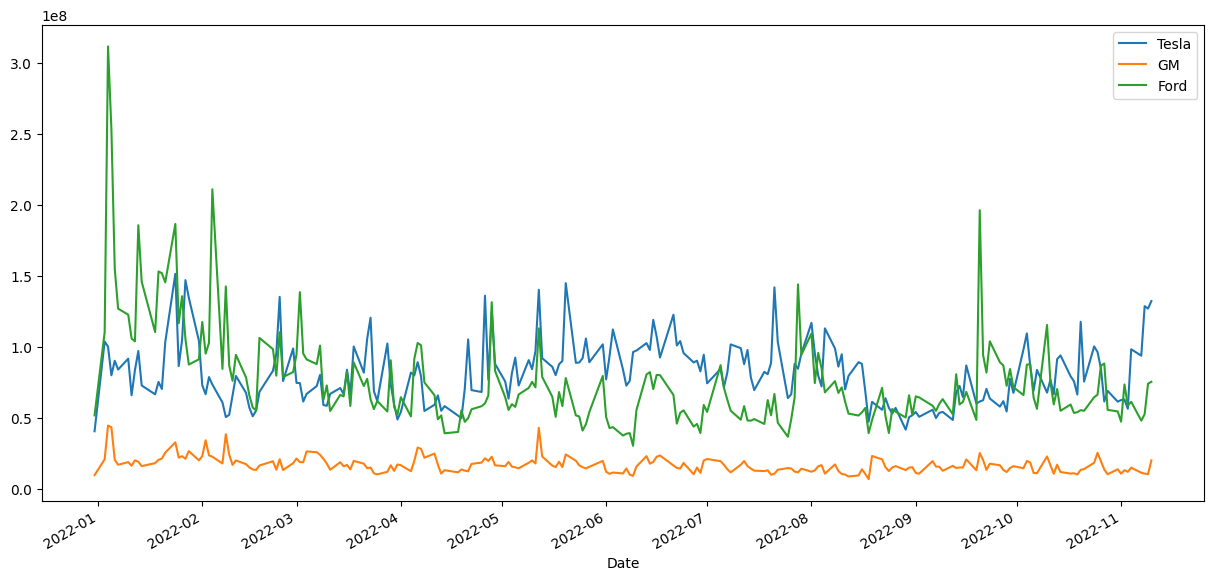

In [33]:
tesla['Volume'].plot(figsize=(15,7), label='Tesla')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend()

<AxesSubplot: xlabel='Date'>

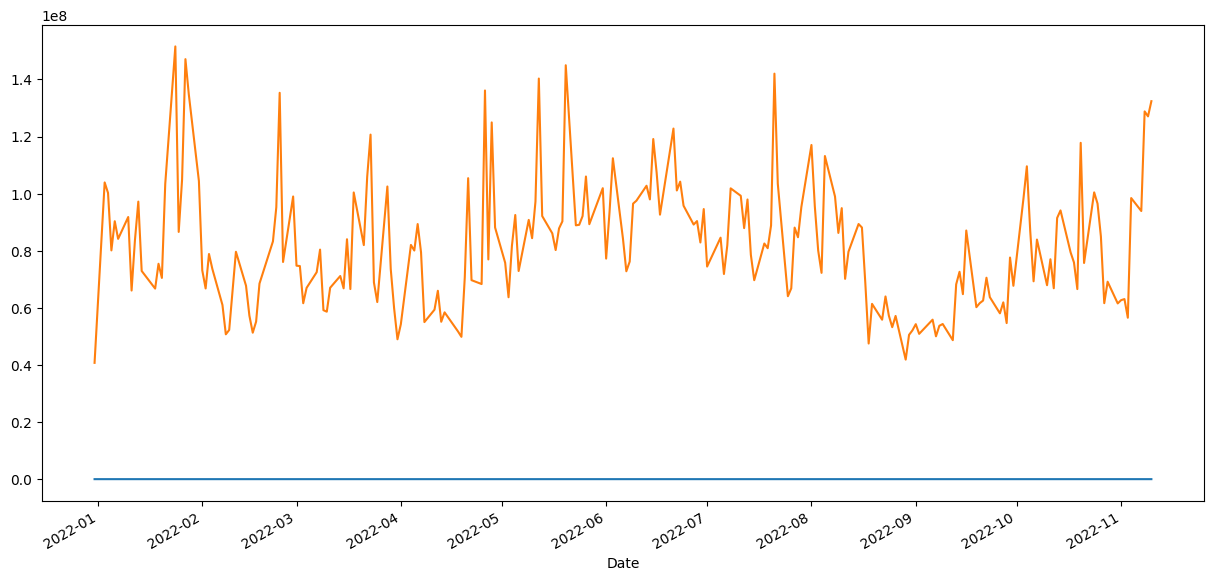

In [40]:
# TODO
# My idea Overlay stock price with volume; Expectation: High Volume = Big change in price
tesla['Close'].plot(figsize=(15,7), label='Tesla Price')
tesla['Volume'].plot(label='Tesla Volume')

In [42]:
# TODO Market cap
tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-31,360.666656,351.529999,357.813324,352.260010,40733700.0,352.260010
2022-01-03,400.356659,378.679993,382.583344,399.926666,103931400.0,399.926666
2022-01-04,402.666656,374.350006,396.516663,383.196655,100248300.0,383.196655
2022-01-05,390.113342,360.336670,382.216675,362.706665,80119800.0,362.706665
2022-01-06,362.666656,340.166656,359.000000,354.899994,90336600.0,354.899994
...,...,...,...,...,...,...
2022-11-04,223.800003,203.080002,222.600006,207.470001,98453100.0,207.470001
2022-11-07,208.899994,196.660004,208.649994,197.080002,93916500.0,197.080002
2022-11-08,195.199997,186.750000,194.020004,191.300003,128803400.0,191.300003


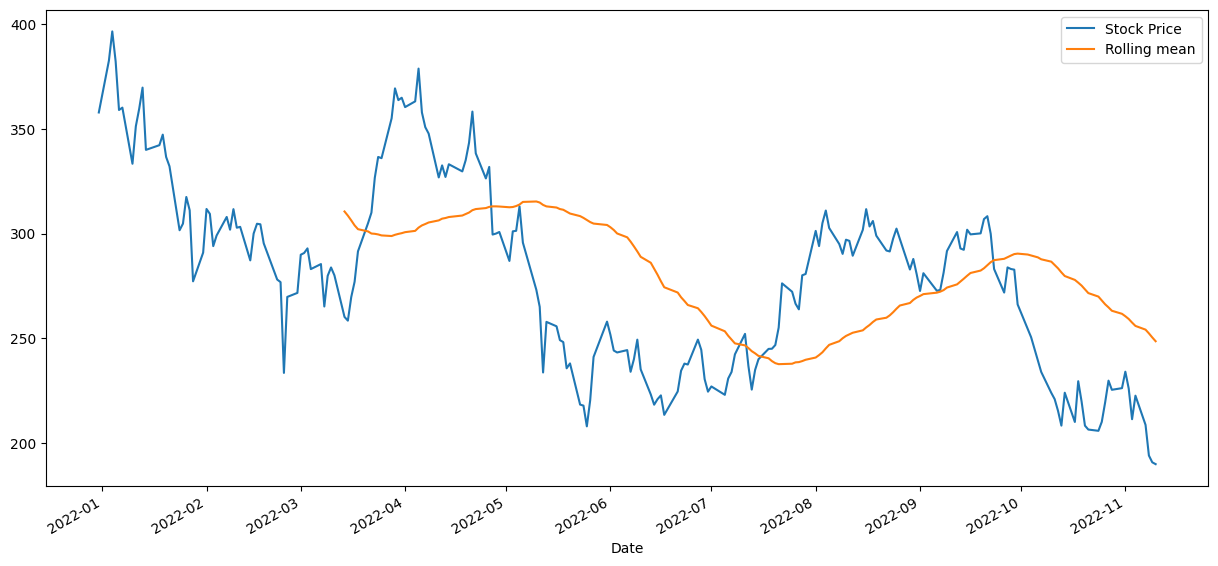

In [49]:
tesla['Open'].plot(figsize=(15,7), label="Stock Price")
tesla['MA50'] = tesla['Open'].rolling(50).mean()
tesla['MA50'].plot(label='Rolling mean')
plt.legend()

In [52]:
import pandas as pd
from pandas.plotting import scatter_matrix

In [53]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

array([[<AxesSubplot: xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot: xlabel='GM Open', ylabel='Tesla Open'>,
        <AxesSubplot: xlabel='Ford Open', ylabel='Tesla Open'>],
       [<AxesSubplot: xlabel='Tesla Open', ylabel='GM Open'>,
        <AxesSubplot: xlabel='GM Open', ylabel='GM Open'>,
        <AxesSubplot: xlabel='Ford Open', ylabel='GM Open'>],
       [<AxesSubplot: xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot: xlabel='GM Open', ylabel='Ford Open'>,
        <AxesSubplot: xlabel='Ford Open', ylabel='Ford Open'>]],
      dtype=object)

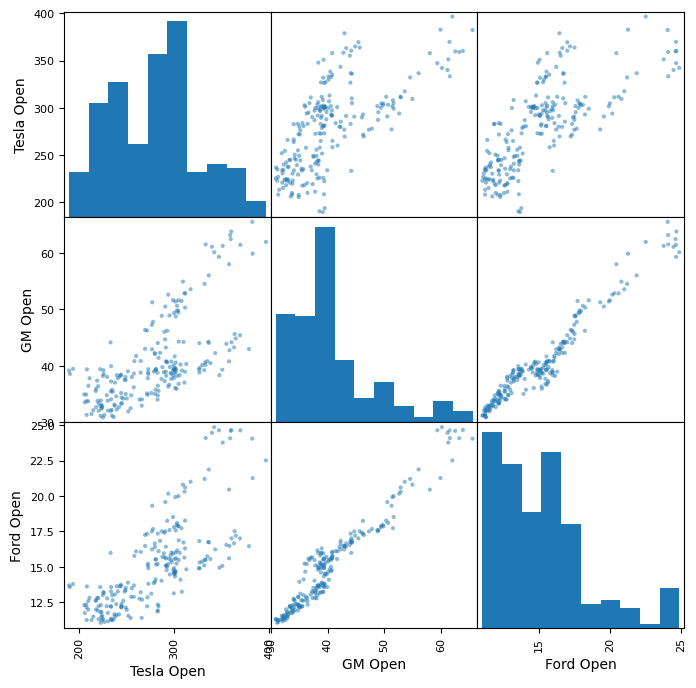

In [55]:
scatter_matrix(car_comp, figsize=(8,8))
# Helpful at pinpointing correlelations

In [81]:
import mplfinance as mpf
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator, DayLocator, MONDAY

In [92]:
fordJan = ford.loc['2022-01':'2022-01']
fordJan

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,21.879999,21.059999,21.270000,21.770000,110449000.0,21.303030
2022-01-04,24.559999,22.420000,22.520000,24.309999,311645200.0,23.788546
2022-01-05,24.950001,23.469999,24.059999,23.660000,253540000.0,23.152489
2022-01-06,24.620001,23.360001,24.090000,24.459999,155058800.0,23.935329
2022-01-07,24.910000,24.040001,24.670000,24.440001,127017500.0,23.915758
2022-01-10,24.440001,23.350000,24.100000,23.850000,122800700.0,23.338415
2022-01-11,24.350000,23.280001,23.780001,24.350000,106011600.0,23.827688
2022-01-12,24.840000,24.010000,24.610001,24.469999,104050000.0,23.945114
2022-01-13,25.870001,24.370001,24.639999,25.020000,185780500.0,24.483316


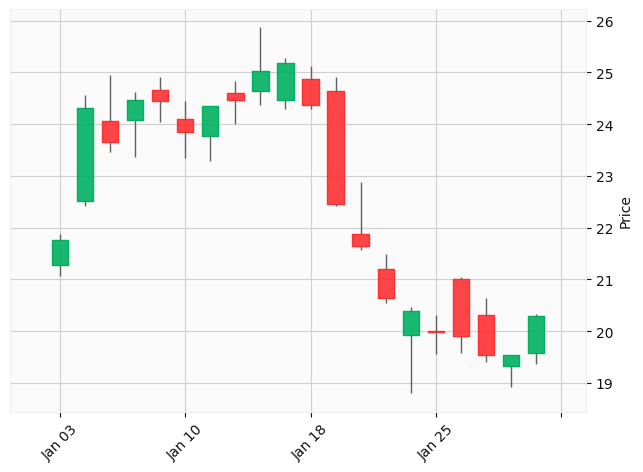

In [94]:
#ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date:date2num(date))
#ford_values = [tuple(vals) for vals in ford_reset[['date_ax','Open','High','Low','Close']]]

#mondays = WeekdayLocator(MONDAY)
#alldays = DayLocator()
#weekFormatter = DateFormatter('%b %d')
#dayFormatter = DateFormatter('%d')


mpf.plot(fordJan, type='candle', style="yahoo")

## Daily percentage change

- r(t) = (p(t)/p(t-1)) - 1

In [97]:
tesla['Daily Returns'] = (tesla['Close']/tesla['Close'].shift(1)) - 1
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,MA50,returns,Daily Returns
Date,,,,,,,,,
2021-12-31,360.666656,351.529999,357.813324,352.260010,40733700.0,352.260010,NaN,NaN,NaN
2022-01-03,400.356659,378.679993,382.583344,399.926666,103931400.0,399.926666,NaN,0.135317,0.135317
2022-01-04,402.666656,374.350006,396.516663,383.196655,100248300.0,383.196655,NaN,-0.041833,-0.041833
2022-01-05,390.113342,360.336670,382.216675,362.706665,80119800.0,362.706665,NaN,-0.053471,-0.053471
2022-01-06,362.666656,340.166656,359.000000,354.899994,90336600.0,354.899994,NaN,-0.021523,-0.021523


<AxesSubplot: >

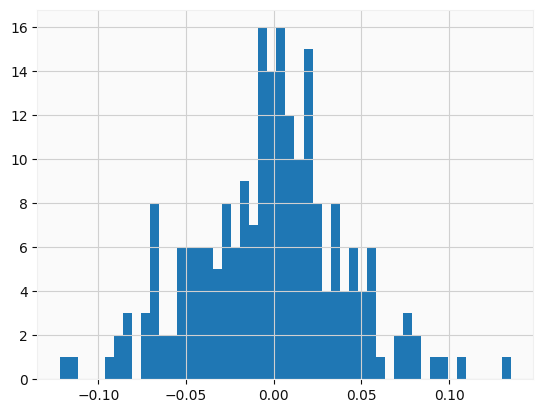

In [99]:
tesla['Daily Returns'].hist(bins=50)

In [100]:
gm['Daily Returns'] = (gm['Close']/gm['Close'].shift(1)) - 1
ford['Daily Returns'] = (ford['Close']/ford['Close'].shift(1)) - 1

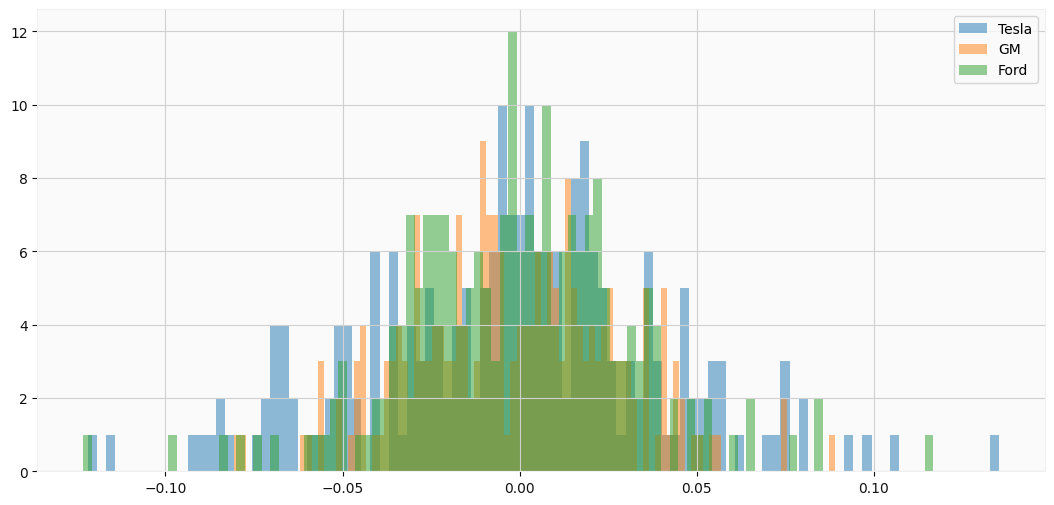

In [105]:
tesla['Daily Returns'].hist(bins=100, label='Tesla',alpha=0.5,figsize=(13,6))
gm['Daily Returns'].hist(bins=100, label='GM',alpha=0.5)
ford['Daily Returns'].hist(bins=100, label='Ford',alpha=0.5)
plt.legend()

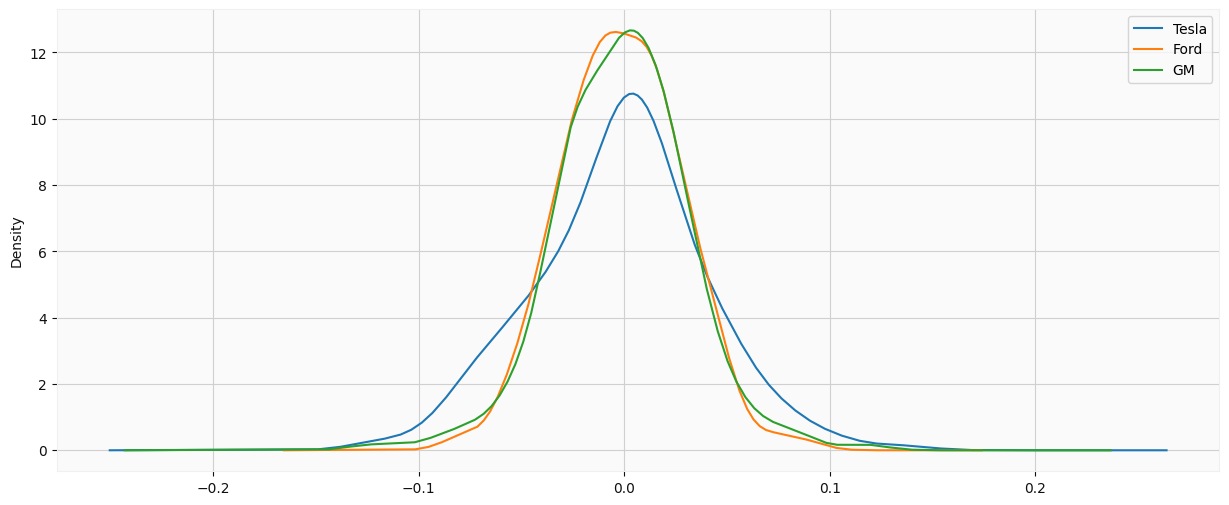

In [108]:
# kernel density estimation
tesla['Daily Returns'].plot(kind='kde', label='Tesla', figsize=(15,6))
gm['Daily Returns'].plot(kind='kde', label='Ford')
ford['Daily Returns'].plot(kind='kde', label='GM')
plt.legend()

<AxesSubplot: >

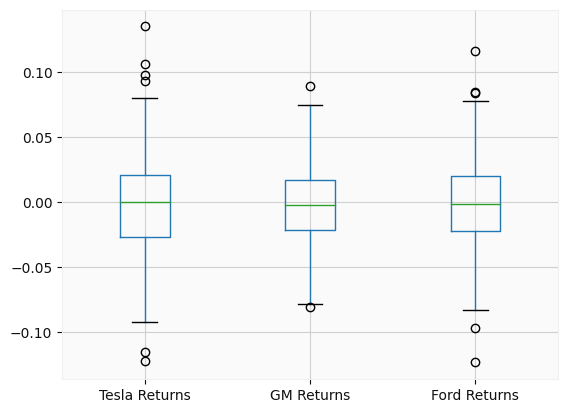

In [141]:
box_df = pd.concat([tesla['Daily Returns'], gm['Daily Returns'], ford['Daily Returns']], axis=1)
box_df.columns=['Tesla Returns', 'GM Returns', 'Ford Returns']
box_df.boxplot()


[Text(0, 1.7589296577023212, '-0.1'),
 Text(0, 4.8698587430557465, '-0.05'),
 Text(0, 7.980787828409173, '0.0'),
 Text(0, 11.091716913762596, '0.05'),
 Text(0, 14.202645999116022, '0.1')]

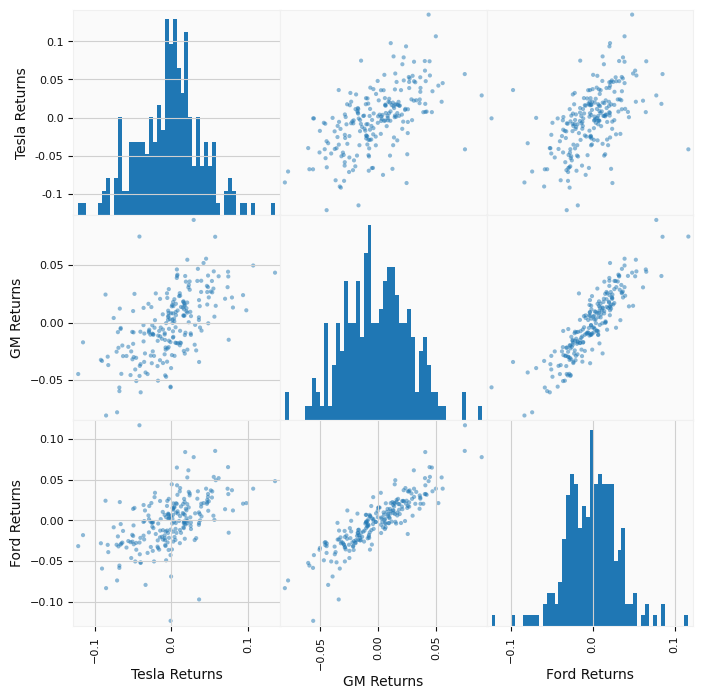

In [147]:
axes = scatter_matrix(box_df,figsize=(8,8),hist_kwds={'bins':50},alpha=0.5)
new_labels = [round(float(i.get_text()), 2) for i in axes[0,0].get_yticklabels()]
axes[0,0].set_yticklabels(new_labels)

## Cumulative returns

In [149]:
tesla['Cumulative Return'] = (1 + tesla['Daily Returns']).cumprod()
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,MA50,returns,Daily Returns,Cumulative Return
Date,,,,,,,,,,
2021-12-31,360.666656,351.529999,357.813324,352.260010,40733700.0,352.260010,NaN,NaN,NaN,NaN
2022-01-03,400.356659,378.679993,382.583344,399.926666,103931400.0,399.926666,NaN,0.135317,0.135317,1.135317
2022-01-04,402.666656,374.350006,396.516663,383.196655,100248300.0,383.196655,NaN,-0.041833,-0.041833,1.087823
2022-01-05,390.113342,360.336670,382.216675,362.706665,80119800.0,362.706665,NaN,-0.053471,-0.053471,1.029656
2022-01-06,362.666656,340.166656,359.000000,354.899994,90336600.0,354.899994,NaN,-0.021523,-0.021523,1.007494


In [150]:
gm['Cumulative Return'] = (1 + gm['Daily Returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['Daily Returns']).cumprod()

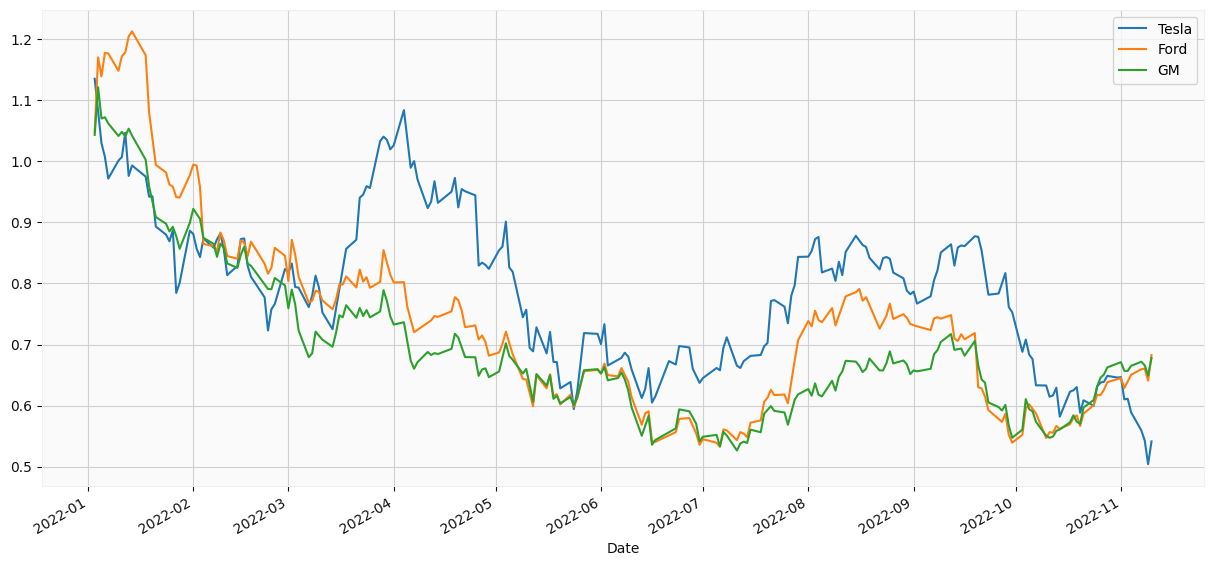

In [153]:
tesla['Cumulative Return'].plot(label='Tesla', figsize=(15,7))
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()

## Linear regression

In [5]:
start1 = datetime.datetime(2010,1,1)
end1 = datetime.datetime(2012,12,31)

start2 = datetime.datetime(2018,1,1)
end2 = datetime.datetime(2021,1,1)

In [6]:
googleTrain = pdr.DataReader('GOOGL', 'yahoo', start1, end1)
googleTest = pdr.DataReader('GOOGL', 'yahoo', start2, end2)

In [7]:
googleTrain = googleTrain.reset_index()
googleTest = googleTest.reset_index()

In [8]:
X1old = googleTrain["Date"]
X2old = googleTest["Date"]

y1 = googleTrain["Close"]
y2 = googleTest["Close"]

In [9]:
X1 = X1old[:,np.newaxis]
X2 = X2old[:,np.newaxis]

C:\Users\kkomt\AppData\Local\Temp\ipykernel_15508\4015383755.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X1 = X1old[:,np.newaxis]
C:\Users\kkomt\AppData\Local\Temp\ipykernel_15508\4015383755.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X2 = X2old[:,np.newaxis]


In [10]:
X1coded = [] 
for i in range(len(X1)):
   X1coded.append(i)
   #X1new.append(X1[i,0].astype(np.int64))
X1codedArray =np.array(X1coded)
X1codedArrayVertical = X1codedArray[:,np.newaxis]

In [11]:
from sklearn.linear_model import LinearRegression


model = LinearRegression(fit_intercept=True)

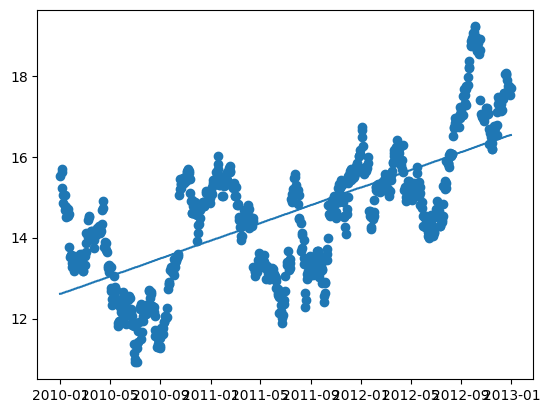

In [12]:
model.fit(X1codedArrayVertical, y1)
yfit = model.predict(X1codedArrayVertical)
plt.scatter(X1, y1) # raw data
plt.plot(X1, yfit) # model fit

The resulting model calculated by the Least square method is: y = 0.0052 * x + 12.6108

In [13]:
print(model.coef_)
print(model.intercept_)

[0.00520625]
12.610843771598974


Coefficient of determination ("R squared") meassures how much of the entirely variability in the data can be explained by the model. The rest are residuals.
As we can see. Rughly 47% of the entire varibability can be explained by the model. Such a low value can be "good enough" for something like a psychology research. But for anything related to mathematics it is not sufficient


In [23]:
model.score(X1codedArrayVertical, y1)

0.4692039327054366

In [14]:
import statsmodels.api as sm

Regression analysis result summary. Library sm used.
F-statistics (the result of the analysis of variance in regression) shows that the model as a whole is valid. (p-value is close to zero)
If we take a look down at the bottom of the table we can see that if we look at the coeficient and the interecept separetely. Both of them passed the test and are statisically significant.

In [15]:
X3 = sm.add_constant(X1codedArrayVertical)
result = sm.OLS(y1,X3).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     665.6
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          1.15e-105
Time:                        09:07:35   Log-Likelihood:                -1213.3
No. Observations:                 755   AIC:                             2431.
Df Residuals:                     753   BIC:                             2440.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6108      0.088    143.509      0.000      12.438      12.783
x1             0.0052      0.000     25.800      0.000       0.005       0.006
==============================================================================
Omnibus:                       39.810   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.481
Skew:                           0.077   Prob(JB):                     0.000264
Kurtosis:                       2.293   Cond. No.                         870.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Resiudal plot shows a problem with heteroscedasticity. Regression prerequisite not met. 

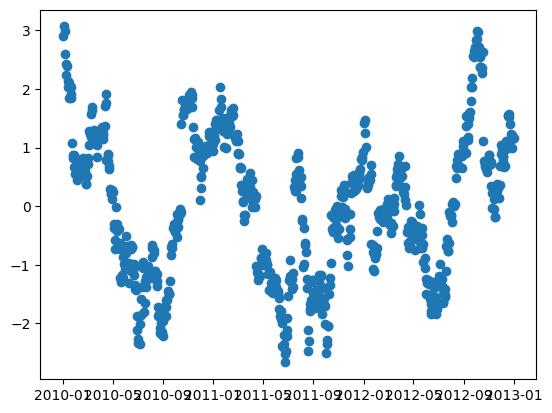

In [35]:
plt.scatter(X1, result.resid)

Q-Q plot shows that residuals are somewhat close to normal distribution => Regression prerequisite  met. 

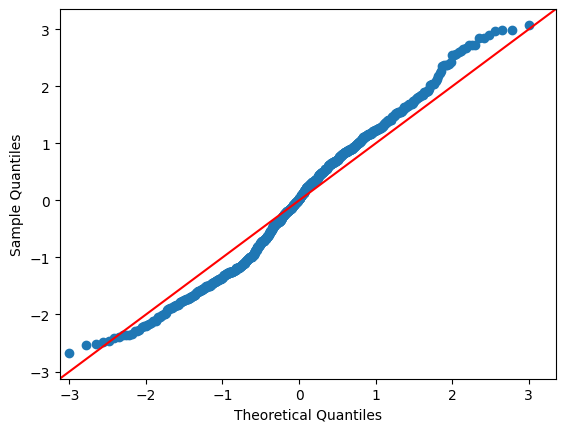

In [28]:
import pylab

sm.qqplot(result.resid, line='45')
pylab.show()

histogram shows that residuals are somewhat close to normal distribution => Regression prerequisite  met. 

(array([ 23.,  59., 127.,  88., 106., 128., 125.,  65.,  17.,  17.]),
 array([-2.66889097, -2.09516348, -1.521436  , -0.94770851, -0.37398102,
         0.19974647,  0.77347396,  1.34720145,  1.92092894,  2.49465643,
         3.06838391]),
 <BarContainer object of 10 artists>)

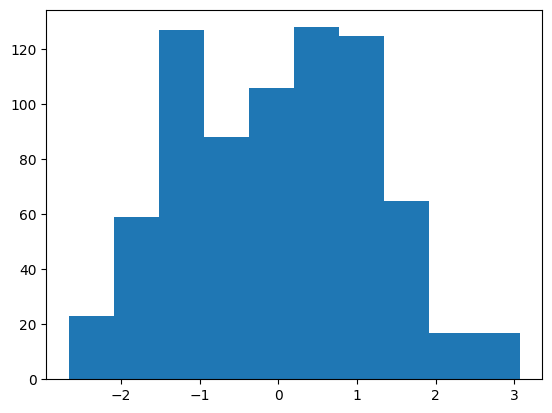

In [17]:
# residuals are somewhat normally distributed
plt.hist(result.resid)

The statistical test for nomrality shows that residuals ARE normally distribution => Regression prerequisite  met. 
The three test show the same result. We did 3 test just to show 3 possible ways how to test for normality

In [18]:
from scipy.stats import normaltest
stat, p = normaltest(result.resid)
print(p)
## p < 0.05 => passed the test. Residuals are normally distributed. Regression prerequisite met.

2.266351765063296e-09
